# Mertcan Kılıçlı 

Problem: Investigation of mean arterial blood pressure, age, weight, body surface area, duration of high blood pressure history, basal heart rate and stress measure data of 20 people with high blood pressure (hypertension).

y = mean arterial blood pressure (mm Hg)

x1 = age(years)

x2 = Weight(kg)

x3 = Body surface area (m2)

x4 = History of high blood pressure (years)

x5 = Basal heart rate (beats/min)

x6 = Stress Measure

Obtaining the data: blood-pressure_1 data set

Source: "Multivariate Statistical Methods", 2021, Prof. Dr. Reha Alpar,Detay Publications

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import scipy
import plotly.express as px
import warnings
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go 
warnings.simplefilter("ignore")
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action = 'ignore') # uyarıları göz ardı edelim
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_excel("blood-pressure_1.xlsx",index_col=0)
df.head()

,y1,x1,x2,x3,x4,x5,x6
Hasta,,,,,,,
1,106,46,85.3,1.75,5.1,63,33
2,115,49,94.2,2.10,3.8,70,14
3,116,49,95.4,1.97,8.2,72,10
4,117,50,94.7,2.01,5.8,73,99
5,112,51,89.4,1.88,7.0,72,95


In [ ]:
df.columns = ['ortalama ateryel kan basıncı','yaş','ağırlık','vücut yüzeyi alanı','yüksek tansiyon hikayesi süresi','bazal kalp atım hızı','stres ölçüsü']

In [ ]:
df.isnull().sum()

ortalama ateryel kan basıncı       0
yaş                                0
ağırlık                            0
vücut yüzeyi alanı                 0
yüksek tansiyon hikayesi süresi    0
bazal kalp atım hızı               0
stres ölçüsü                       0
dtype: int64

In [ ]:
df.dropna()

,ortalama ateryel kan basıncı,yaş,ağırlık,vücut yüzeyi alanı,yüksek tansiyon hikayesi süresi,bazal kalp atım hızı,stres ölçüsü
Hasta,,,,,,,
1,106,46,85.3,1.75,5.1,63,33
2,115,49,94.2,2.10,3.8,70,14
3,116,49,95.4,1.97,8.2,72,10
4,117,50,94.7,2.01,5.8,73,99
5,112,51,89.4,1.88,7.0,72,95
6,121,48,99.5,2.24,9.3,71,10
7,121,49,99.8,2.25,2.5,69,42
8,110,47,90.9,1.90,6.2,66,8
9,110,49,89.2,1.83,7.1,69,62


In [ ]:
df.shape

(20, 7)

In [ ]:
df.isnull()

,ortalama ateryel kan basıncı,yaş,ağırlık,vücut yüzeyi alanı,yüksek tansiyon hikayesi süresi,bazal kalp atım hızı,stres ölçüsü
Hasta,,,,,,,
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
df.isnull().any()

ortalama ateryel kan basıncı       False
yaş                                False
ağırlık                            False
vücut yüzeyi alanı                 False
yüksek tansiyon hikayesi süresi    False
bazal kalp atım hızı               False
stres ölçüsü                       False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ortalama ateryel kan basıncı     20 non-null     int64  
 1   yaş                              20 non-null     int64  
 2   ağırlık                          20 non-null     float64
 3   vücut yüzeyi alanı               20 non-null     float64
 4   yüksek tansiyon hikayesi süresi  20 non-null     float64
 5   bazal kalp atım hızı             20 non-null     int64  
 6   stres ölçüsü                     20 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 KB


In [ ]:
#betimsel istatistikler hesaplansın 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ortalama ateryel kan basıncı,20.0,114.0500,5.345682,106.00,110.000,114.00,116.250,125.00
yaş,20.0,48.5500,2.543826,45.00,46.750,48.50,49.250,56.00
ağırlık,20.0,92.5900,4.697581,84.50,89.350,93.40,94.875,101.30
vücut yüzeyi alanı,20.0,1.9965,0.136045,1.75,1.895,1.98,2.075,2.25
yüksek tansiyon hikayesi süresi,20.0,6.4250,2.147428,2.50,5.250,6.00,7.600,10.20
bazal kalp atım hızı,20.0,69.6000,3.803046,62.00,67.750,70.00,72.000,76.00
stres ölçüsü,20.0,53.3500,37.086350,8.00,17.000,44.50,95.000,99.00



Minimum (min): 106

First Quartile (Q1 or 25th percentile): 110

Median (Q2 or 50th percentile): 114

Third Quartile (Q3 or 75th percentile): 116.250

Maximum (max): 125

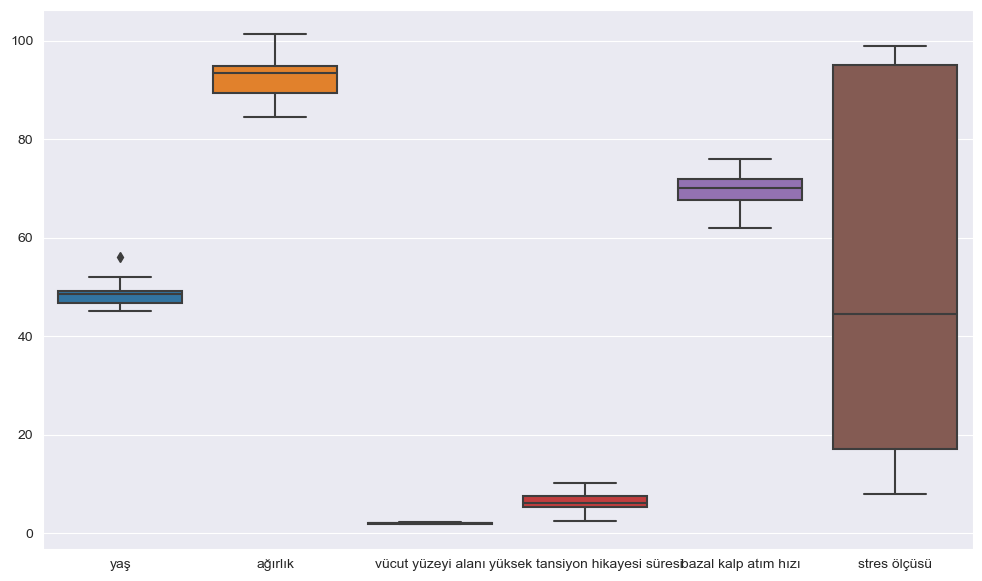

In [ ]:
col_list=['yaş','ağırlık','vücut yüzeyi alanı', 'yüksek tansiyon hikayesi süresi','bazal kalp atım hızı','stres ölçüsü']
plt.figure(figsize=(12,7))
sns.boxplot(data=df[col_list])
plt.show()

In [ ]:
print(df.quantile([0,0.25, 0.5, 0.75, 1]))

      ortalama ateryel kan basıncı    yaş  ağırlık  vücut yüzeyi alanı  \
0.00                        106.00  45.00   84.500               1.750   
0.25                        110.00  46.75   89.350               1.895   
0.50                        114.00  48.50   93.400               1.980   
0.75                        116.25  49.25   94.875               2.075   
1.00                        125.00  56.00  101.300               2.250   

      yüksek tansiyon hikayesi süresi  bazal kalp atım hızı  stres ölçüsü  
0.00                             2.50                 62.00           8.0  
0.25                             5.25                 67.75          17.0  
0.50                             6.00                 70.00          44.5  
0.75                             7.60                 72.00          95.0  
1.00                            10.20                 76.00          99.0  


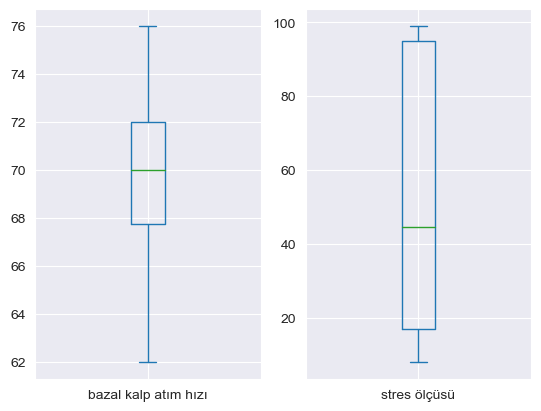

In [ ]:
df[["bazal kalp atım hızı","stres ölçüsü"]].plot(kind='box',subplots=True)
plt.show()

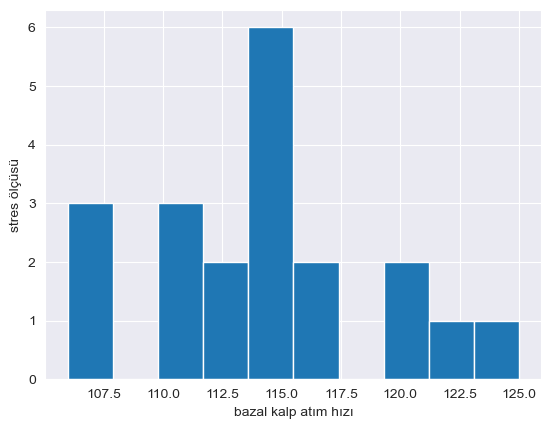

In [ ]:
plt.hist(df["ortalama ateryel kan basıncı"])
plt.xlabel("bazal kalp atım hızı")
plt.ylabel("stres ölçüsü")
plt.show()

<AxesSubplot:xlabel='ortalama ateryel kan basıncı', ylabel='Density'>

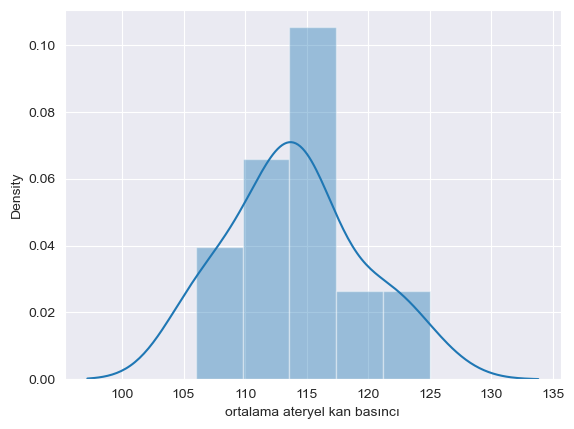

In [ ]:
sns.distplot(df["ortalama ateryel kan basıncı"])

<AxesSubplot:>

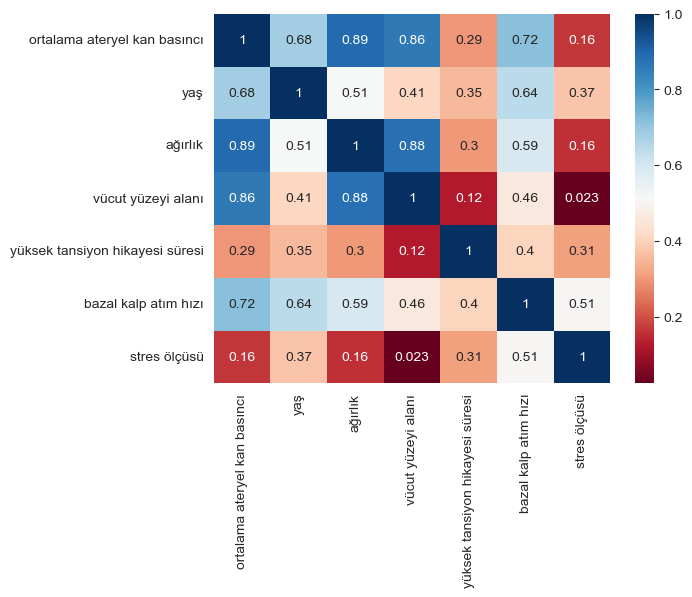

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = "RdBu")

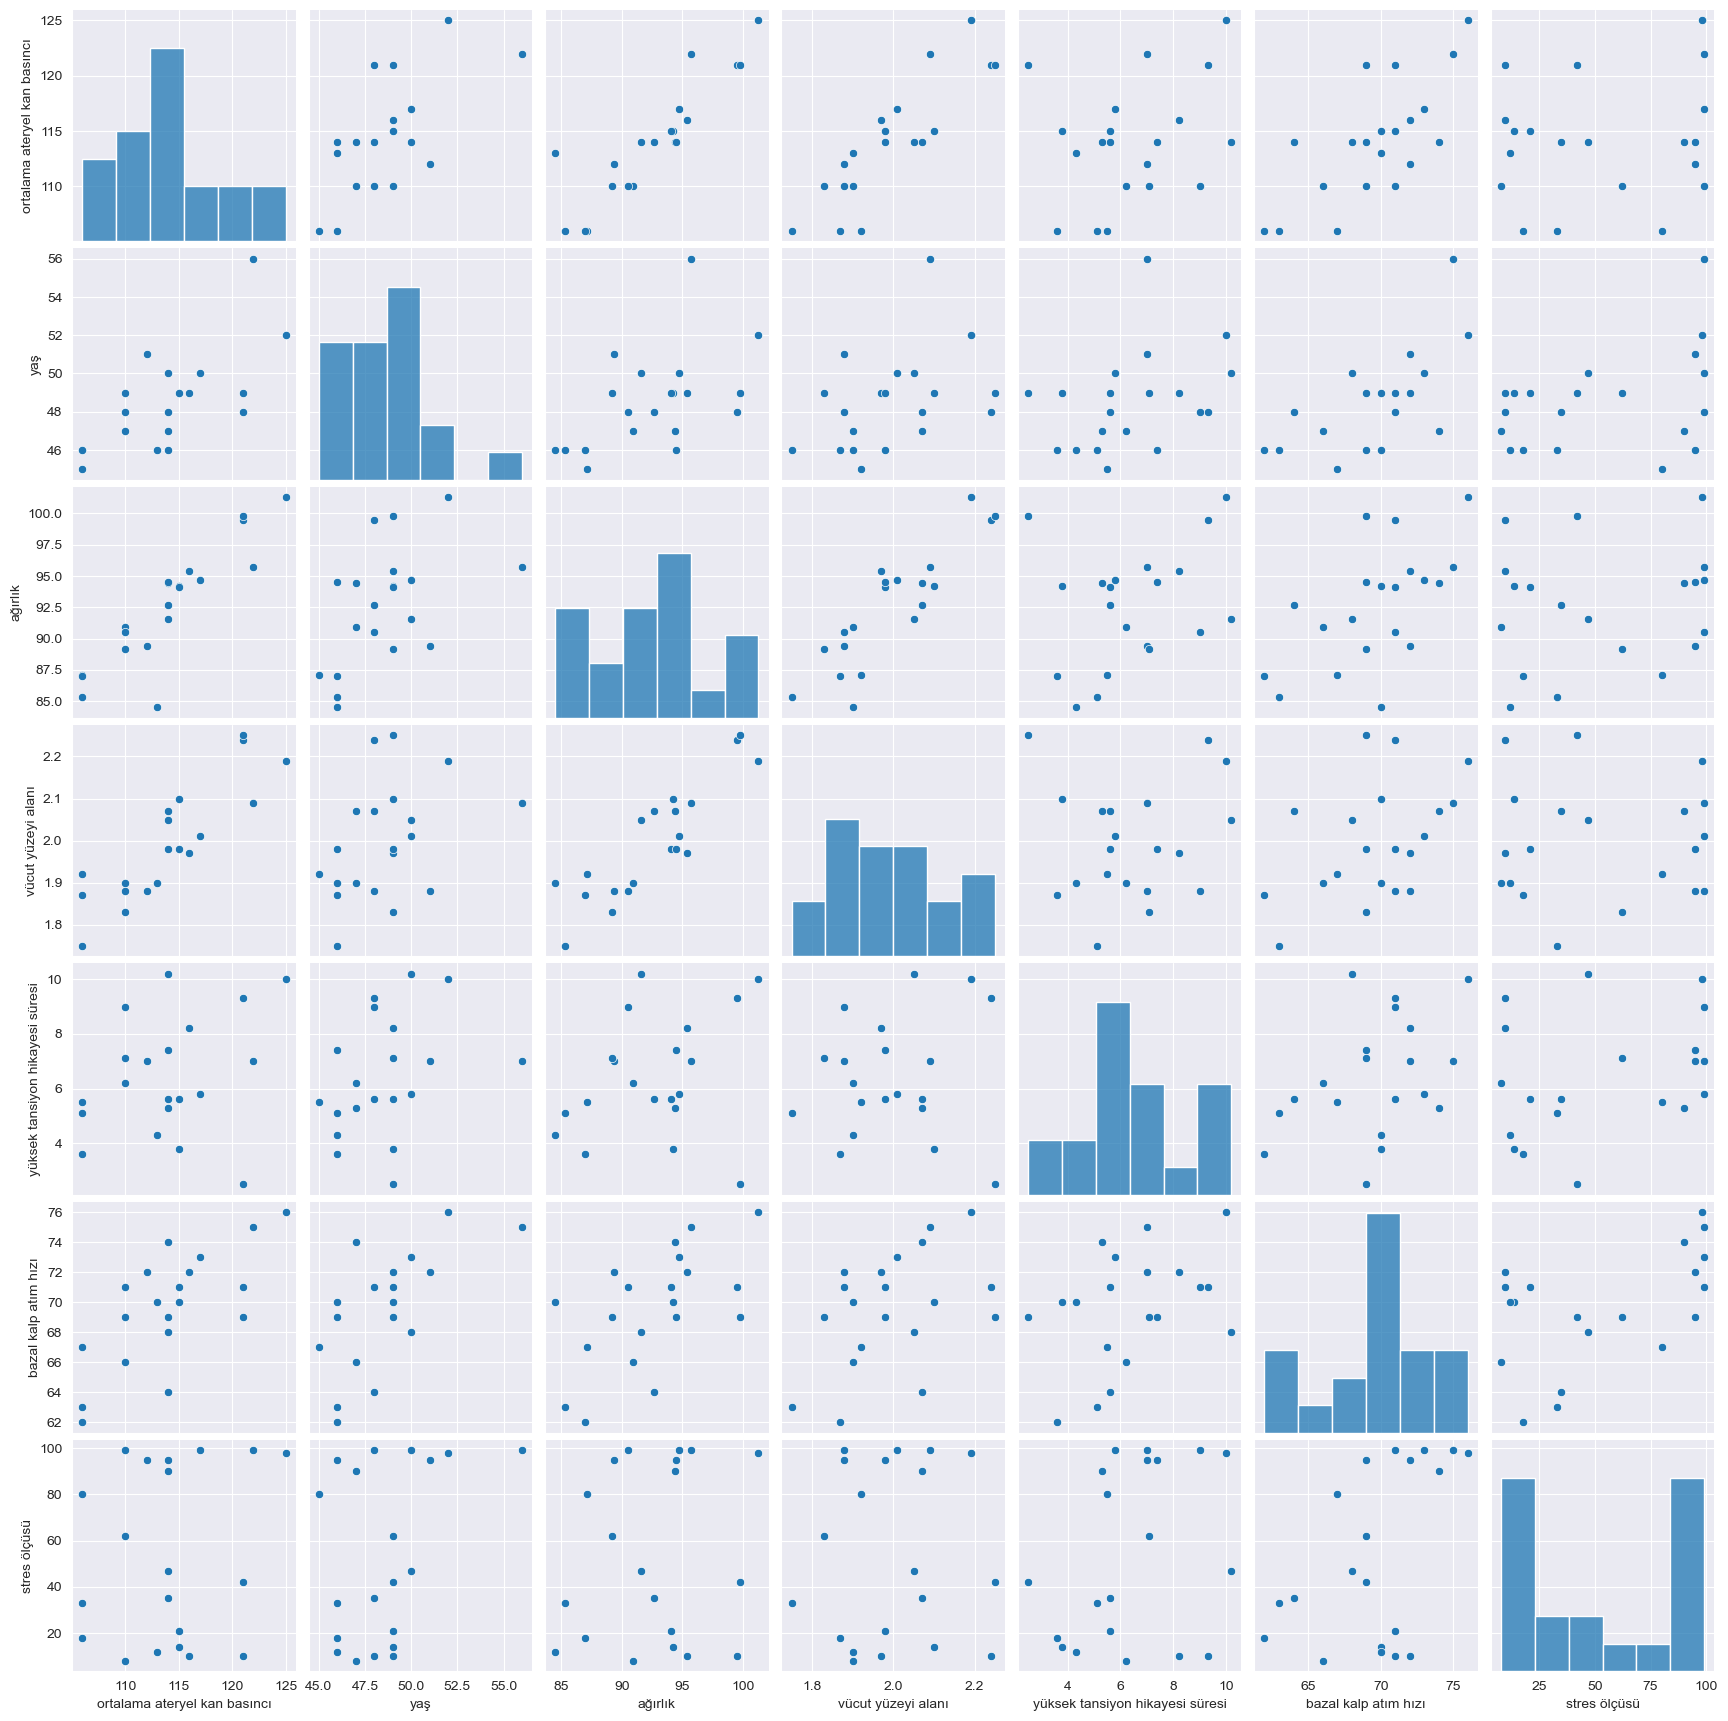

In [ ]:
#veri setindeki değişkenlerin birbiri ile serpilme diyagramı çizdirilerek, verilerin ilişkisi görselleştirilsin 
sns.pairplot(df)

In [ ]:
# Bağımlı ve bağımsız değişkenler tanımlansın.
y = df[['ortalama ateryel kan basıncı']]
X = df[['yaş', 'ağırlık','vücut yüzeyi alanı','yüksek tansiyon hikayesi süresi','bazal kalp atım hızı','stres ölçüsü']]

In [ ]:
# Normallik testi (Shapiro Wilk)
test_stat,p_val = scipy.stats.shapiro(y)
alpha = 0.05
if p_val > alpha:
    print('Veri Normaldir.')
else:
    print('Veri Normal değildir.')

Veri Normaldir.


In [ ]:
gdp=df["ortalama ateryel kan basıncı"]*100000
df["gdp"]=gdp
df
fig2 = px.scatter(df,
                  x = 'yaş',                  y = "bazal kalp atım hızı",


                  size = "gdp",
                  template = "plotly_white",
                  color = "stres ölçüsü",
                  hover_name = "stres ölçüsü",
                  )
fig2.show();

In [ ]:
fig2 = px.scatter(df,
                  x = 'stres ölçüsü',
                  y = "bazal kalp atım hızı",

                  size = "gdp",
                  template = "plotly_white",
                  color = "ortalama ateryel kan basıncı",
                  hover_name = "ortalama ateryel kan basıncı",
                  )
fig2.show();

In [ ]:
# Bağımlı ve bağımsız değişkenler tanımlansın.
y = df[['ortalama ateryel kan basıncı']]
X = df[['yaş', 'ağırlık','vücut yüzeyi alanı','yüksek tansiyon hikayesi süresi','bazal kalp atım hızı','stres ölçüsü']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
LR.coef_

array([[ 7.49429062e-01,  8.78466494e-01,  5.58191844e+00,
         2.15143634e-02, -3.92718870e-02,  3.44341504e-03]])

In [ ]:
coeff_LR = pd.DataFrame(LR.coef_.T,X.columns,columns=['LR_Parametre Tahminleri']) 
coeff_LR.loc['Intercept'] = LR.intercept_
coeff = coeff_LR.T
coeff 

,yaş,ağırlık,vücut yüzeyi alanı,yüksek tansiyon hikayesi süresi,bazal kalp atım hızı,stres ölçüsü,Intercept
LR_Parametre Tahminleri,0.749429,0.878466,5.581918,0.021514,-0.039272,0.003443,-13.02161


Y(^)= -13.02161 + 0.749429 × yaş + 0.878466 × ağırlık + 5.581918 × vücut yüzeyi alanı + 0.021514 × yüksek tansiyon hikayesi süresi - 0.039272 × bazal kalp atım hızı + 0.003443 ×
stres ölçüsü

In [ ]:
LR_train = LR.predict(X_train) 
LR_test = LR.predict(X_test)

In [ ]:
R2_LRtrain = r2_score(y_train, LR_train)
MAE_LRtrain = mean_absolute_error(y_train, LR_train)
MSE_LRtrain = mean_squared_error(y_train, LR_train)

R2_LRtest = r2_score(y_test, LR_test)
MAE_LRtest = mean_absolute_error(y_test, LR_test) 
MSE_LRtest = mean_squared_error(y_test, LR_test)

results = pd.DataFrame([], columns = ['R2','MAE','RMSE'])
results.loc['LR_training'] = [R2_LRtrain, MAE_LRtrain, np.sqrt(MSE_LRtrain)] 
results.loc['LR_testing'] = [R2_LRtest, MAE_LRtest, np.sqrt(MSE_LRtest)] 
results

,R2,MAE,RMSE
LR_training,0.996498,0.266043,0.320034
LR_testing,0.269293,2.240652,3.930182


In [ ]:
#58 yaşında, 86 kg ağırlığında, vücut yüzeyi alanı 3,Yüksek tansiyon hikayesi süresi 4 yıl,
#Bazal kalp atım hızı 80,Stres ölçüsü 79 olan bir bireyin Ortalama anteryel kan basıncını tahmin edelim. 
tahmini_basınc = LR.predict([[58,86,3,4,80,79]])
print(tahmini_basınc)

[[119.95548522]]


#### Model matematiksel olarak anlamlı mı?

In [ ]:
x2= sm.add_constant(X)
model = sm.OLS(y, x2)
model_res =model.fit()
model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     ortalama ateryel kan basıncı   R-squared:                       0.928
Model:                                      OLS   Adj. R-squared:                  0.895
Method:                           Least Squares   F-statistic:                     28.10
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):           1.01e-06
Time:                                  13:54:52   Log-Likelihood:                -35.022
No. Observations:                            20   AIC:                             84.04
Df Residuals:                                13   BIC:                             91.01
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.3379     10.172      0.328      0.748     -18.638      25.314
yaş                                 0.5322      0.211      2.518      0.026       0.076       0.989
ağırlık                             0.2966      0.208      1.424      0.178      -0.153       0.746
vücut yüzeyi alanı                 15.8708      6.555      2.421      0.031       1.710      30.031
yüksek tansiyon hikayesi süresi     0.0155      0.213      0.073      0.943      -0.445       0.476
bazal kalp atım hızı                0.3818      0.166      2.298      0.039       0.023       0.741
stres ölçüsü                       -0.0177      0.013     -1.356      0.198      -0.046       0.011
==============================================================================
Omnibus:                        1.576   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                0.993
Skew:                           0.541   Prob(JB):                        0.609
Kurtosis:                       2.852   Cond. No.                     3.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Prob (F-statstc): 1.01e-06 olduğundan model anlamlıdır.

Model için R-squared:0.928 ve Adj. R-squared: 0.895 biçimindedir. Buna göre, bağımsız değişkenin bağımlı değişken açıklayıcılık değerinin yaklaşık %89.5 olduğu söylenebilir.

Bağımsız değişkenler için p=0.000>0.05 olduğundan model katsayıları anlamlı değildir.
Fakat,x1,x3, ve x5 için bu değişken anlamlıdır.

Omnibus testi, bir dağılımın normal olduğuna dair sıfır hipotezini test etmek için çarpıklık ve basıklık değerlerini kullanır. Prob(Omnibus)>0.05 ise, H0 hipotez red edilemez. Hataların normal dağılımlı olduğu söylenir. Buna göre, Prob(Omnibus):0.888<0.05 olduğundan, hatalar normal dağılımlıdır.

Çarpıklık (Skew), bir dağılımın asimetrisinin ölçüsüdür. Bu değer, (-0.5,0.5) aralığında ise, veri kümesinin oldukça simetrik olduğu kabul edilir.

Basıklık (Kurtoss), eğrinin ne kadar zirve yaptığının ölçüsüdür.

Jarque-Bera testi, çarpıklığı ve basıklığı dikkate alan bir başka testtir. H0 hpotezi, dağılımın normal olduğu, çarpıklığın sıfır ve basıklığın üç olduğu biçimindedir. Buna göre, Prob(JB):0.432>0.05 olduğundan, H0 hipotez red edilemez.


Durbin-Watson, otokorelasyonu kontrol etmektedir. İstatistik değeri [0,4] aralığındadır. Durbin-Watson değerinin iki civarında olması otokorelasyon olmadığını gösterir.

Koşul numarası (Cond. No.), 30'dan büyükse, regresyon modelinin çoklu bağlantıya sahip olableceği kabul edilir. İki bağımsız değşken arasında yüksek düzeyde korelasyon olduğunu göstermektedir.

Yeni modelimiz

Y(^)= -13.02161 + 0.749429 × x1 + 5.581918 × x3  - 0.039272 x5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]
vif['Değişken'] = X.columns
vif

,VIF,Değişken
0,621.009976,yaş
1,2097.970697,ağırlık
2,1057.168158,vücut yüzeyi alanı
3,12.769776,yüksek tansiyon hikayesi süresi
4,826.311578,bazal kalp atım hızı
5,4.272654,stres ölçüsü


In [ ]:
model1 = sm.OLS(y,X['yaş'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.998
Model:                                      OLS   Adj. R-squared (uncentered):              0.998
Method:                           Least Squares   F-statistic:                          1.261e+04
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    2.77e-28
Time:                                  13:54:53   Log-Likelihood:                         -58.138
No. Observations:                            20   AIC:                                      118.3
Df Residuals:                                19   BIC:                                      119.3
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                 coe

In [ ]:
model1 = sm.OLS(y,X['ağırlık'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.999
Model:                                      OLS   Adj. R-squared (uncentered):              0.999
Method:                           Least Squares   F-statistic:                          3.729e+04
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    9.40e-33
Time:                                  13:54:54   Log-Likelihood:                         -47.307
No. Observations:                            20   AIC:                                      96.61
Df Residuals:                                19   BIC:                                      97.61
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                 coe

In [ ]:
model1 = sm.OLS(y,X['vücut yüzeyi alanı'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.999
Model:                                      OLS   Adj. R-squared (uncentered):              0.999
Method:                           Least Squares   F-statistic:                          1.485e+04
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    5.87e-29
Time:                                  13:54:54   Log-Likelihood:                         -56.506
No. Observations:                            20   AIC:                                      115.0
Df Residuals:                                19   BIC:                                      116.0
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                    

In [ ]:
model1 = sm.OLS(y,X['yüksek tansiyon hikayesi süresi'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.910
Model:                                      OLS   Adj. R-squared (uncentered):              0.905
Method:                           Least Squares   F-statistic:                              192.4
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    2.17e-11
Time:                                  13:54:55   Log-Likelihood:                         -99.041
No. Observations:                            20   AIC:                                      200.1
Df Residuals:                                19   BIC:                                      201.1
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                    

In [ ]:
model1 = sm.OLS(y,X['bazal kalp atım hızı'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.999
Model:                                      OLS   Adj. R-squared (uncentered):              0.998
Method:                           Least Squares   F-statistic:                          1.320e+04
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    1.79e-28
Time:                                  13:54:55   Log-Likelihood:                         -57.682
No. Observations:                            20   AIC:                                      117.4
Df Residuals:                                19   BIC:                                      118.4
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                    

In [ ]:
model1 = sm.OLS(y,X['stres ölçüsü'])
results1 = model1.fit()
print(results1.summary())

                                      OLS Regression Results                                     
Dep. Variable:     ortalama ateryel kan basıncı   R-squared (uncentered):                   0.691
Model:                                      OLS   Adj. R-squared (uncentered):              0.674
Method:                           Least Squares   F-statistic:                              42.44
Date:                          Wed, 18 Jan 2023   Prob (F-statistic):                    3.06e-06
Time:                                  13:54:56   Log-Likelihood:                         -111.40
No. Observations:                            20   AIC:                                      224.8
Df Residuals:                                19   BIC:                                      225.8
Df Model:                                     1                                                  
Covariance Type:                      nonrobust                                                  
                   c